# WeatherPy
----

#### 3 Observable Trends
* Neither Cloudiness, humidity, nor wind speed show any real meaningful correlation to latitude. 
* Humidity and cloudiness doesn't play too much of a factor no matter how close or far the city is to the equator. Though wind speed has a slight uptick the more we get away from the equator. 
* The further away we get from the equator the colder it becomes and thusly the closer we move into the equator the warmer temperature becomes as we could've predicted. 

In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress 
import json

# Import API key from py file
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
units = "imperial"
# Output File (CSV) to export dataframe to csv 
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat and lng pairs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique or not in list, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count// checking the length 
len(cities)

594

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# Starting URL for Weather Map API/ base url units imperial from above! 
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="

In [8]:
# Creating empty lists for the dataframe to store data from API calls 
city_data = []
clouds = []
dates = []
humidity = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# Creating initial counter quantities
record_count = 0
set_count = 1

In [9]:
# Cannot get this is print to logger list. Tried before the for loop and after the try and just nothing works. 
# print('Beginning Data Retrieval')
# print('-----------------------------')

# loops through all cities in our list and subsequently runs API requeest for each of the cities 
for city in cities:
    try:
        # Parse JSON and retrieve the informationm
        response = requests.get(url + city.replace(" ","&")).json()
        
        # Parsing out the cloudiness, countries, humidity, etc;
        clouds.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        # This groups the cities in sets of 50 for logging
        if record_count > 50:
            record_count = 1
            set_count += 1
            city_data.append(city)
        else:
            record_count += 1
            city_data.append(city)
        print(f"Processing Record {record_count} of Set {set_count} | {city}")
    except Exception:
    # This prints the url, record and set numbers    
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")    

City not found. Skipping...
Processing Record 1 of Set 1 | lawton
Processing Record 2 of Set 1 | upington
Processing Record 3 of Set 1 | kovernino
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | mayo
City not found. Skipping...
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | ulaanbaatar
Processing Record 9 of Set 1 | torbay
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | mahebourg
Processing Record 12 of Set 1 | cape town
City not found. Skipping...
Processing Record 13 of Set 1 | kavaratti
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | padang
Processing Record 16 of Set 1 | lata
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | ashqelon
City not found. Skipping...
Processing Record 19 of Set 1 | souillac
Processing Record 20 of Set 1 | ostrovnoy
Processing Record 21 of Set 1 | mount isa
Processing Record 22 of Set 1 | werda
Processin

Processing Record 33 of Set 4 | caqueza
Processing Record 34 of Set 4 | kaitangata
Processing Record 35 of Set 4 | manokwari
City not found. Skipping...
Processing Record 36 of Set 4 | coro
Processing Record 37 of Set 4 | dikson
Processing Record 38 of Set 4 | coquimbo
Processing Record 39 of Set 4 | charleston
City not found. Skipping...
Processing Record 40 of Set 4 | arvika
Processing Record 41 of Set 4 | tavda
Processing Record 42 of Set 4 | ust-nera
Processing Record 43 of Set 4 | itarema
Processing Record 44 of Set 4 | jinzhou
Processing Record 45 of Set 4 | aykhal
Processing Record 46 of Set 4 | grandview
Processing Record 47 of Set 4 | salym
Processing Record 48 of Set 4 | rockhampton
Processing Record 49 of Set 4 | grand river south east
Processing Record 50 of Set 4 | flinders
Processing Record 51 of Set 4 | altamont
Processing Record 1 of Set 5 | mabaruma
Processing Record 2 of Set 5 | canakkale
Processing Record 3 of Set 5 | cayenne
City not found. Skipping...
Processing Re

Processing Record 17 of Set 8 | deputatskiy
Processing Record 18 of Set 8 | saint-augustin
Processing Record 19 of Set 8 | ojinaga
Processing Record 20 of Set 8 | nsawam
City not found. Skipping...
Processing Record 21 of Set 8 | guymon
Processing Record 22 of Set 8 | port hardy
Processing Record 23 of Set 8 | kathu
Processing Record 24 of Set 8 | grand gaube
Processing Record 25 of Set 8 | inirida
Processing Record 26 of Set 8 | savelugu
Processing Record 27 of Set 8 | lar gerd
Processing Record 28 of Set 8 | avanigadda
Processing Record 29 of Set 8 | hohhot
Processing Record 30 of Set 8 | popondetta
Processing Record 31 of Set 8 | lewisporte
Processing Record 32 of Set 8 | uyuni
City not found. Skipping...
Processing Record 33 of Set 8 | nouadhibou
Processing Record 34 of Set 8 | huarmey
Processing Record 35 of Set 8 | brawley
Processing Record 36 of Set 8 | nuqui
Processing Record 37 of Set 8 | kingsville
Processing Record 38 of Set 8 | goundam
Processing Record 39 of Set 8 | morbac

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
#Creating a dictionary to display the the data frame in rows and columns; 

dict_weather = {
    "City":city_data,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Humidity":humidity,
    "Cloudiness":clouds,
    "Wind Speed":wind_speeds,
    "Country":countries,
    "Date":dates   
}

# Establishing a dataframe to display
display_weather = pd.DataFrame(dict_weather)
display_weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lawton,34.6087,-98.3903,62.51,32,0,10.36,US,1650937916
1,upington,-28.4478,21.2561,44.98,70,0,0.00,ZA,1650937916
2,kovernino,57.1253,43.8142,49.33,93,100,6.11,RU,1650937916
3,barrow,71.2906,-156.7887,15.82,73,75,14.97,US,1650937608
4,hilo,19.7297,-155.0900,81.28,94,100,6.91,US,1650937610


In [11]:
#Using .describe to show statistical analysis of data
#display_weather.count() shows how many countries were actually found and were dealing with
display_weather.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,5.340000e+02
mean,23.493369,17.410010,59.576011,72.357678,59.430712,7.400468,1.650938e+09
std,31.950797,83.657703,19.953636,22.188121,39.656852,5.484226,1.674791e+02
min,-54.800000,-175.200000,0.210000,1.000000,0.000000,0.000000,1.650937e+09
25%,-1.974025,-50.157175,45.352500,63.000000,19.000000,3.507500,1.650938e+09
50%,28.266700,21.783300,61.745000,78.000000,73.000000,5.990000,1.650938e+09
75%,49.800075,76.212900,76.225000,88.000000,100.000000,9.400000,1.650938e+09
max,78.218600,178.416700,92.770000,100.000000,100.000000,31.430000,1.650938e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
#Using .describe to show statistical analysis of data
#display_weather.count() shows how many countries were actually found and were dealing with
display_weather.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,5.340000e+02
mean,23.493369,17.410010,59.576011,72.357678,59.430712,7.400468,1.650938e+09
std,31.950797,83.657703,19.953636,22.188121,39.656852,5.484226,1.674791e+02
min,-54.800000,-175.200000,0.210000,1.000000,0.000000,0.000000,1.650937e+09
25%,-1.974025,-50.157175,45.352500,63.000000,19.000000,3.507500,1.650938e+09
50%,28.266700,21.783300,61.745000,78.000000,73.000000,5.990000,1.650938e+09
75%,49.800075,76.212900,76.225000,88.000000,100.000000,9.400000,1.650938e+09
max,78.218600,178.416700,92.770000,100.000000,100.000000,31.430000,1.650938e+09


In [13]:
# Get the indices of cities that have humidity over 100%.
# The max humidity was 100% so we skip this step. 
display_weather.count() #This shows how many countries were actually found and were dealing with

City          534
Lat           534
Lng           534
Max Temp      534
Humidity      534
Cloudiness    534
Wind Speed    534
Country       534
Date          534
dtype: int64

In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#display_weather.to_csv("output_data/cities.csv", index = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

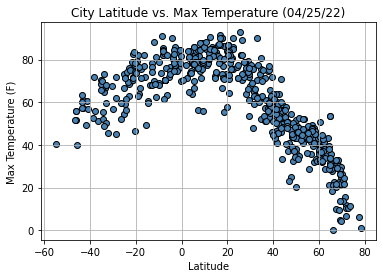

In [15]:
#Building a scatter plot for latitude vs temperature 
plt.scatter(display_weather["Lat"],display_weather["Max Temp"],edgecolors="black",facecolors="steelblue")

plt.title(f"City Latitude vs. Max Temperature ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("../Images/Fig1.png")

## Latitude vs. Humidity Plot

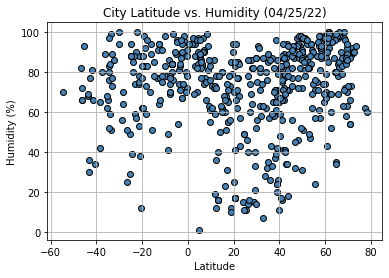

In [16]:
#Building a scatter plot for latitude vs temperature 
plt.scatter(display_weather["Lat"],display_weather["Humidity"],edgecolors="black",facecolors="steelblue")

plt.title(f"City Latitude vs. Humidity ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("../Images/Fig2.png")

## Latitude vs. Cloudiness Plot

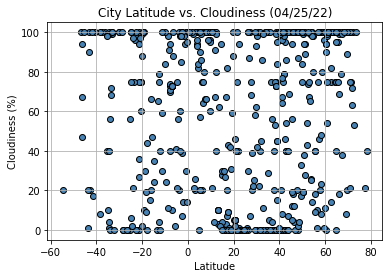

In [17]:
#Building a scatter plot for latitude vs temperature 
plt.scatter(display_weather["Lat"],display_weather["Cloudiness"],edgecolors="black",facecolors="steelblue")

plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("../Images/Fig3.png")

## Latitude vs. Wind Speed Plot

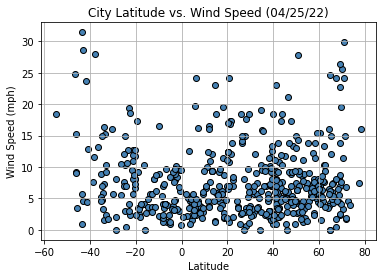

In [38]:
#Building a scatter plot for latitude vs temperature 
plt.scatter(display_weather["Lat"],display_weather["Wind Speed"],edgecolors="black",facecolors="steelblue")

plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("../Images/Fig4.png")

## Linear Regression

In [68]:
# # Create Northern and Southern Hemisphere DataFrames
# northern_hemis = display_weather.loc[display_weather["Lat"] >= 0:]
# southern_hemis = display_weather.loc[display_weather["Lat"] < 0:]

In [69]:
# Defining the function for creating linear regession and scatter plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=14,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [70]:
northern_hemis = display_weather.loc[display_weather["Lat"] >= 0]
southern_hemis = display_weather.loc[display_weather["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.897355725926041


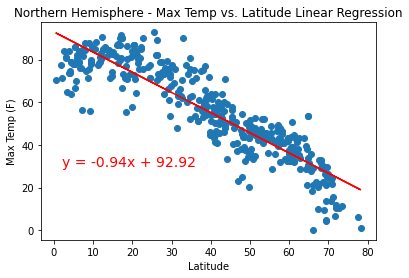

Positive correlation. In Northern cities temperatures decrease further from equator, the higher north the colder it is.


<Figure size 432x288 with 0 Axes>

In [113]:
x_values = northern_hemis["Lat"]
y_values = northern_hemis["Max Temp"]
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plot_linear_regression(x_values,y_values,'Max Temp (F)',(2,30))

plt.savefig('../Images/Fig5.png')
print("Positive correlation. In Northern cities temperatures decrease further from equator, the higher north the colder it is.")
# # Call an function 
# # equation = linear_regression(northern_hemis["Lat"], northern_hemis["Max Temp"])
# # annotate(northern_hemis["Lat"], northern_hemis["Max Temp"],0, 0)
# a="Lat"
# b="Max Temp"
# pos= (0,20)
# plotLinearRegression(northern_hemis[a], northern_hemis[b],a,b,pos,5)
# # Set a title

# # plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
# # plt.xlabel("Latitude")
# # plt.ylabel("Max Temp (F)")
# # plt.savefig("../Images/Fig5.png")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7002905397365667


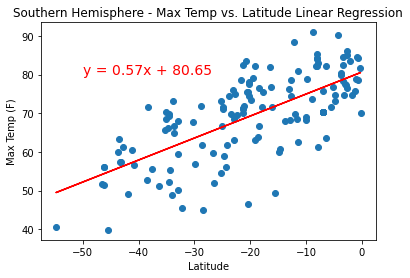

Positive correlation regresion. Temperature increases the closer we get to the equator.


<Figure size 432x288 with 0 Axes>

In [109]:
# Call functions
# equation = linear_agression(southern_hemis["Lat"], southern_hemis["Max Temp"])
# annotate(southern_hemis["Lat"], southern_hemis["Max Temp"], -33, 42)
x_values = southern_hemis["Lat"]
y_values = southern_hemis["Max Temp"]
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plot_linear_regression(x_values,y_values,'Max Temp (F)',(-50,80))
print("Positive correlation regresion. Temperature increases the closer we get to the equator.")
plt.savefig('../Images/Fig6.png')
# # Set a title
# plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
# plt.xlabel("Latitude")
# plt.ylabel("Max Temp (F)")
# plt.savefig("../Images/Fig6.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2413011250741706


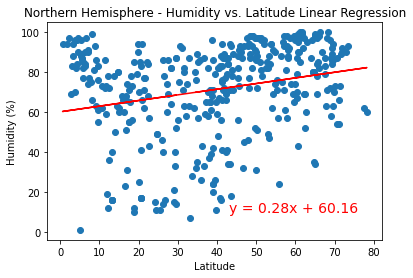

Non or very minimal correlation from regression line. 


<Figure size 432x288 with 0 Axes>

In [114]:
# # Call functions
# equation = linear_agression(northern_hemis["Lat"], northern_hemis["Humidity"])
# annotate(northern_hemis["Lat"], northern_hemis["Humidity"], 0, 40)
x_values = northern_hemis["Lat"]
y_values = northern_hemis["Humidity"]
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plot_linear_regression(x_values,y_values,'Humidity (%)',(43,10))
print("Non or very minimal correlation from regression line. ")
plt.savefig('../Images/Fig7.png')


# # Set a title
# plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
# plt.xlabel("Latitude")
# plt.ylabel("Humidity (%)")
# plt.savefig("../Images/Fig7.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.27676899015933515


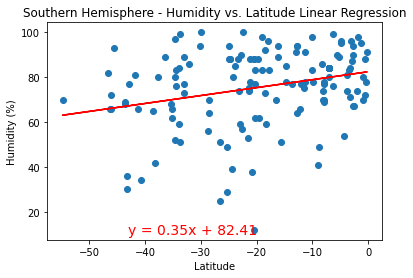

Non correlation from regression line of humidity. 


<Figure size 432x288 with 0 Axes>

In [115]:
# # Call functions
# equation = linear_agression(southern_hemis["Lat"], southern_hemis["Humidity"])
# annotate(southern_hemis["Lat"], southern_hemis["Humidity"], -50, 20)
x_values = southern_hemis["Lat"]
y_values = southern_hemis["Humidity"]
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plot_linear_regression(x_values,y_values,'Humidity (%)',(-43,10))
print("Non correlation from regression line of humidity. ")
plt.savefig('../Images/Fig8.png')

# # Set a title
# plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
# plt.xlabel("Latitude")
# plt.ylabel("Humidity (%)")
# plt.savefig("../Images/Fig8.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21957936907863682


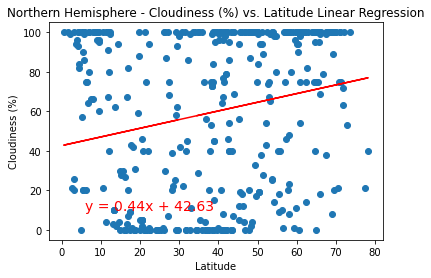

Non correlation from regression line of cloudiness. 


<Figure size 432x288 with 0 Axes>

In [116]:
# # Call functions
# equation = linear_agression(northern_hemis["Lat"], northern_hemis["Cloudiness"])
# annotate(northern_hemis["Lat"], northern_hemis["Cloudiness"], 45, 25)
x_values =  northern_hemis["Lat"]
y_values =  northern_hemis["Cloudiness"]
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plot_linear_regression(x_values,y_values,'Cloudiness (%)',(6,10))
print("Non correlation from regression line of cloudiness. ")
plt.savefig('../Images/Fig9.png')

# # Set a title
# plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
# plt.xlabel("Latitude")
# plt.ylabel("Cloudiness (%)")
# plt.savefig("../Images/Fig9.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04413589641395575


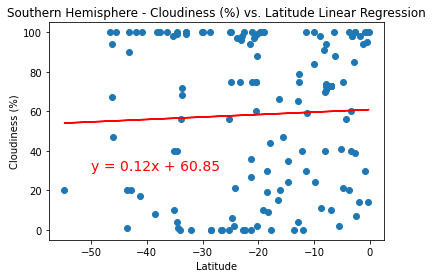

Non correlation from regression line of humidity. 


<Figure size 432x288 with 0 Axes>

In [117]:
# # Call functions
# equation = linear_agression(southern_hemis["Lat"], southern_hemis["Cloudiness"])
# annotate(southern_hemis["Lat"], southern_hemis["Cloudiness"], -50, 20)
x_values =  southern_hemis["Lat"]
y_values =  southern_hemis["Cloudiness"]
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plot_linear_regression(x_values,y_values,'Cloudiness (%)',(-50,30))
print("Non correlation from regression line of humidity. ")
plt.savefig('../Images/Fig10.png')
# # Set a title
# plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
# plt.xlabel("Latitude")
# plt.ylabel("Cloudiness (%)")
# plt.savefig("../Images/Fig10.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0924322280251628


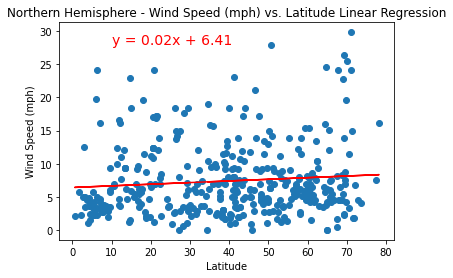

Non correlation from regression line of wind speed. 


<Figure size 432x288 with 0 Axes>

In [118]:
# # Call functions
# equation = linear_agression(northern_hemis["Lat"], northern_hemis["Wind Speed"])
# annotate(northern_hemis["Lat"], northern_hemis["Wind Speed"], 45, 25)
x_values =  northern_hemis["Lat"]
y_values =  northern_hemis["Wind Speed"]
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plot_linear_regression(x_values,y_values,'Wind Speed (mph)',(10,28))
print("Non correlation from regression line of wind speed. ")
plt.savefig('../Images/Fig11.png')
# # Set a title
# plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
# plt.xlabel("Latitude")
# plt.ylabel("Wind Speed (mph)")
# plt.savefig("../Images/Fig11.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.41445714398978833


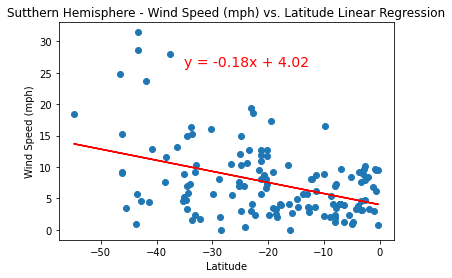

Non correlation from regression line of wind speed. 


<Figure size 432x288 with 0 Axes>

In [119]:
# # Call functions
# equation = linear_agression(southern_hemis["Lat"], southern_hemis["Wind Speed"])
# annotate(southern_hemis["Lat"], southern_hemis["Wind Speed"], -45, 25)
x_values =  southern_hemis["Lat"]
y_values =  southern_hemis["Wind Speed"]
plt.title("Sutthern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plot_linear_regression(x_values,y_values,'Wind Speed (mph)',(-35,26))
print("Non correlation from regression line of wind speed. ")
plt.savefig('../Images/Fig12.png')
# # Set a title
# plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
# plt.xlabel("Latitude")
# plt.ylabel("Wind Speed (mph)")
# plt.savefig("../Images/Fig12.png")